#### Importing Libraries Used in Analysis

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
sns.set_theme(style="whitegrid")

In [2]:
data=pd.read_csv('diamond.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#### Drop the unwanted columns

In [3]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Summary Statistics and Dataframe Properties

In [4]:
print(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [5]:
print(data.shape)

(53940, 10)


In [6]:
print(data.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


#### Checking for null values

In [7]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [8]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


#### Data Visualisation

In [9]:
for col in data.columns:
    if data[col].dtype==object:
        print(col,data[col].unique())
        print("--------------------------------------------------------")

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
--------------------------------------------------------
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
--------------------------------------------------------
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
--------------------------------------------------------


In [10]:
for col in data.columns:
    if data[col].dtype==object:
        print(col)
        print("--------")
        print(data[col].value_counts())
        print("############################################")

cut
--------
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
############################################
color
--------
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
############################################
clarity
--------
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
############################################


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

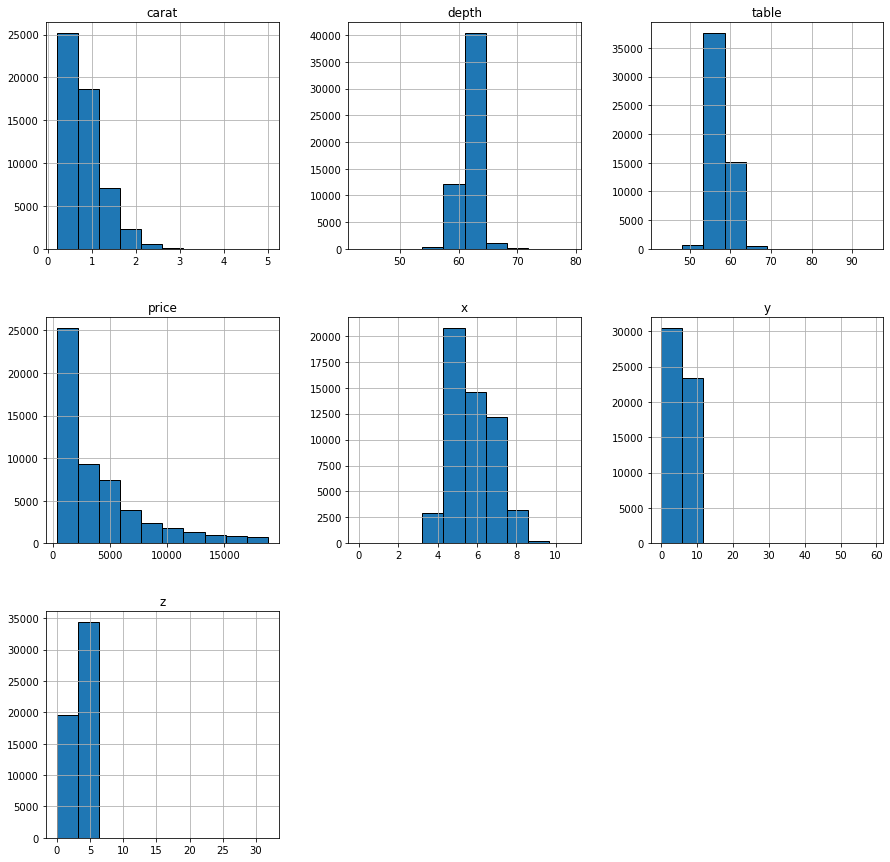

In [11]:
data.hist(figsize=(15,15),linewidth=1,edgecolor='black')

In [16]:
for col in data.columns:
    if data[col].dtype==object:
        print(data.groupby([col])['price'].mean())
        print("__________________________________________")

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64
__________________________________________
color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64
__________________________________________
clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64
__________________________________________


<AxesSubplot:xlabel='cut', ylabel='price'>

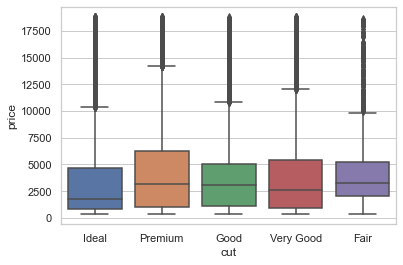

In [20]:
sns.boxplot(x='cut',y='price',data=data)

<AxesSubplot:xlabel='clarity', ylabel='price'>

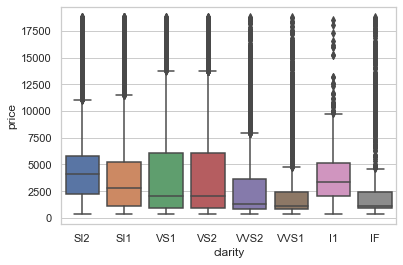

In [21]:
sns.boxplot(x='clarity',y='price',data=data)

<AxesSubplot:xlabel='color', ylabel='price'>

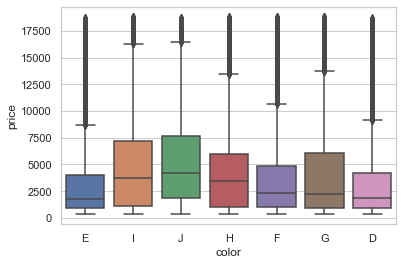

In [22]:
sns.boxplot(x='color',y='price',data=data)

<AxesSubplot:xlabel='x'>

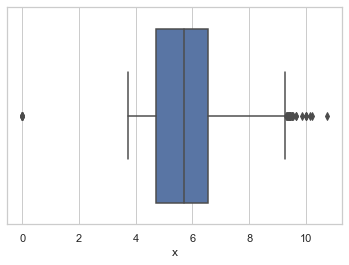

In [24]:
sns.boxplot(x='x',data=data)

<AxesSubplot:xlabel='y'>

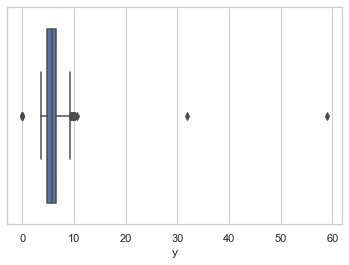

In [25]:
sns.boxplot(x='y',data=data)

<AxesSubplot:xlabel='z'>

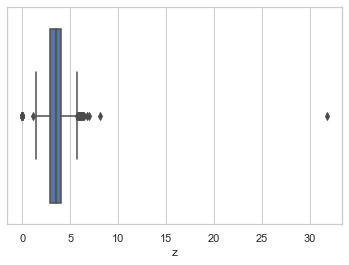

In [26]:
sns.boxplot(x='z',data=data)

<AxesSubplot:xlabel='depth'>

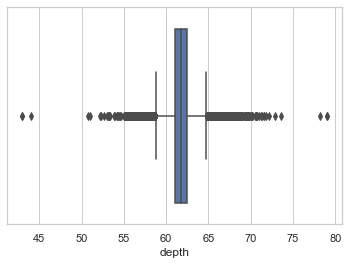

In [27]:
sns.boxplot(x='depth',data=data)

<AxesSubplot:xlabel='table'>

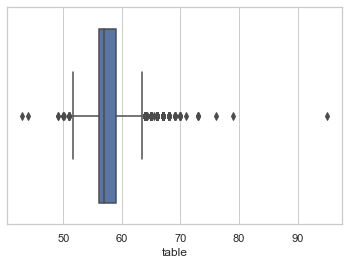

In [28]:
sns.boxplot(x='table',data=data)

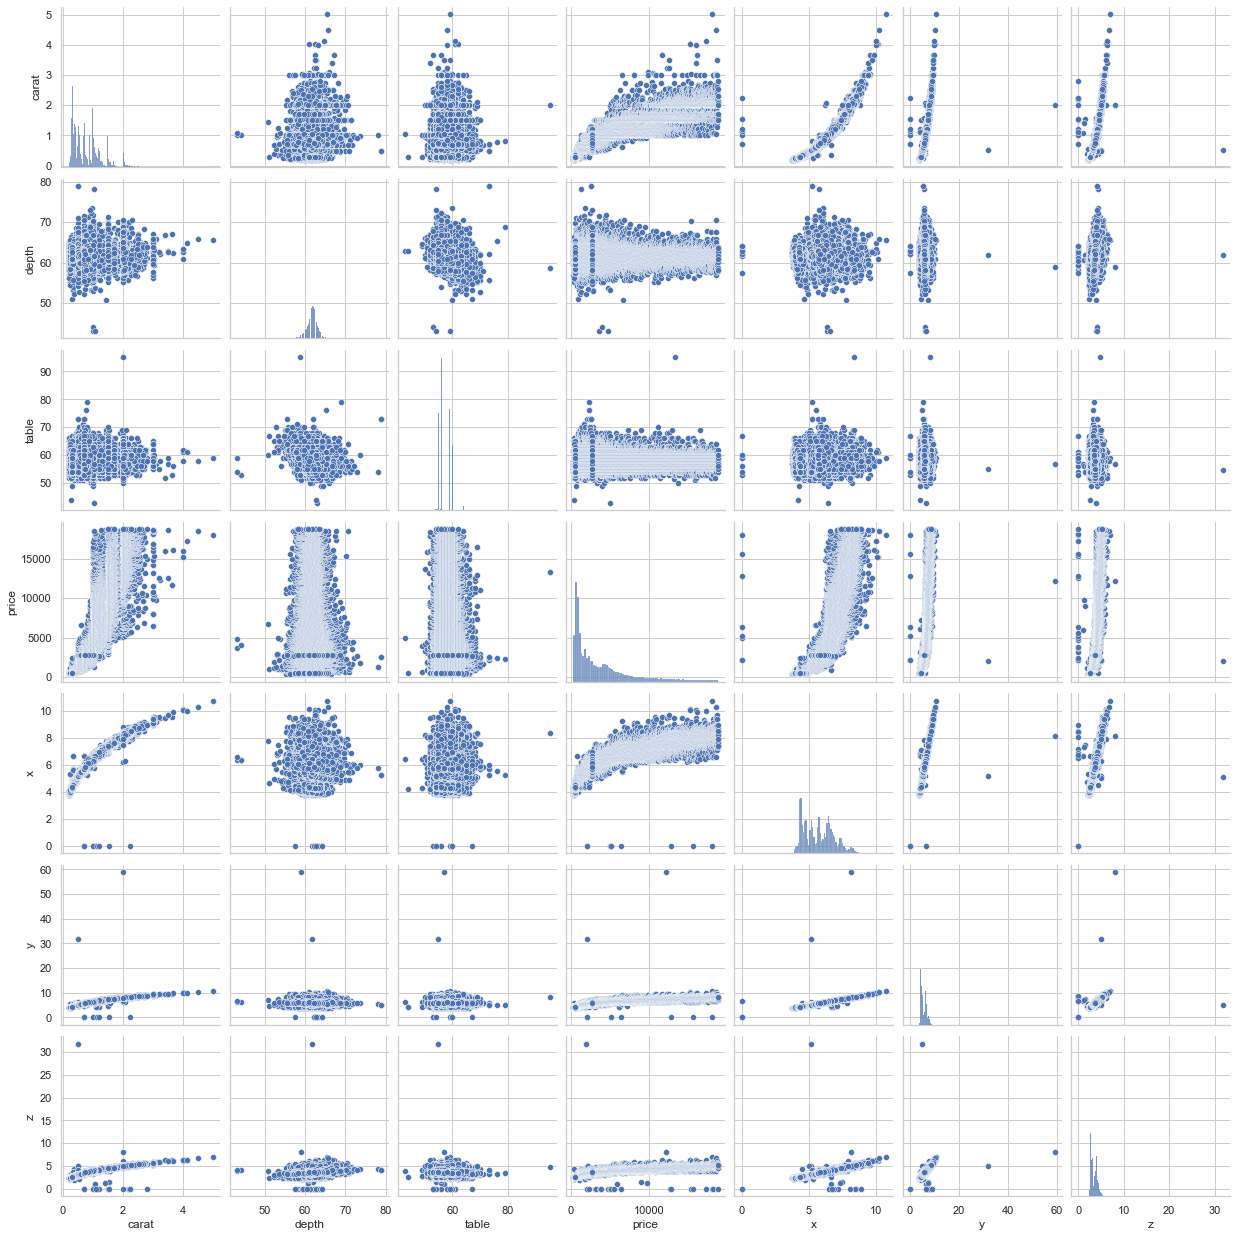

In [31]:
sns.pairplot(data)

In [32]:
dic={'Ideal':1,'Premium':2,'Good':3,'Very Good':4,'Fair':5}
def changecut(x):
    return int(dic[x])

In [33]:
dic1={'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6,'D':7}
def changecolor(x):
    return dic1[x]

In [34]:
dic2={'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}
def changeclarity(x):
    return dic2[x]

In [35]:
data['cut']=data['cut'].apply(changecut)
data['color']=data['color'].apply(changecolor)
data['clarity']=data['clarity'].apply(changeclarity)

In [36]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,3,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,2,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,5,1,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,3,59.4,61.0,338,4.00,4.05,2.39


In [47]:
z_scores = sci.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data1 = data[filtered_entries]

In [48]:
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,3,5,62.8,57.0,336,3.94,3.96,2.48


In [50]:
data1.shape

(51590, 10)

Text(0.5, 1.0, 'Correlation between each variable and price \n')

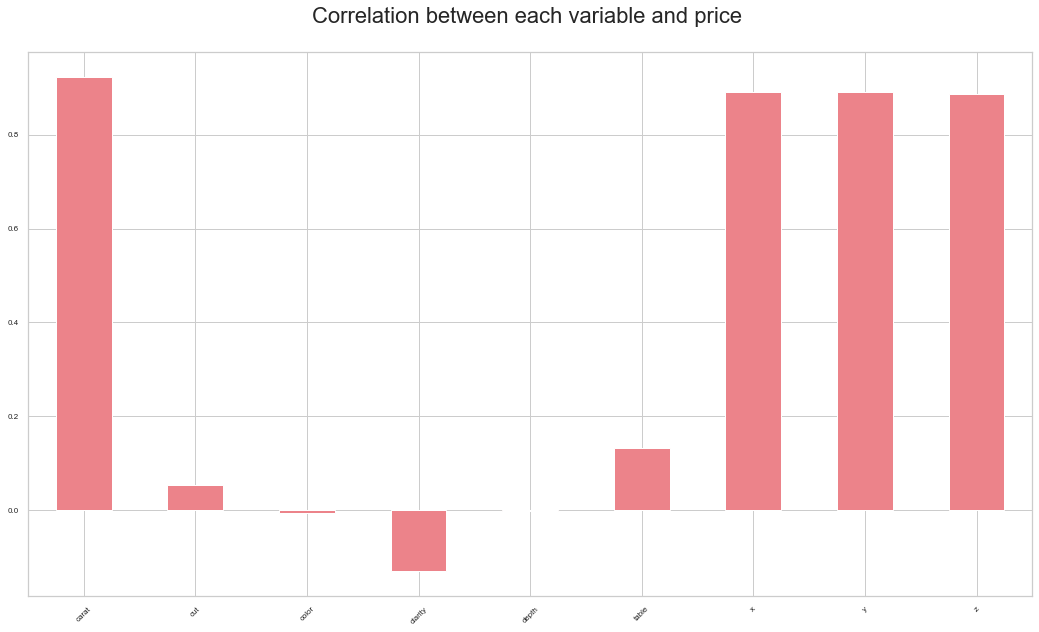

In [53]:
data2 = data1[['carat','cut','color','clarity','depth','table','x','y','z']]
correlations = data2.corrwith(data1.price)
#correlation between same variables are removed
#correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation between each variable and price \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
calc_vif(data2)

,variables,VIF
0,carat,127.383784
1,cut,5.333262
2,color,5.170371
3,clarity,5.067799
4,depth,1308.621701
5,table,955.466123
6,x,13662.883781
7,y,11518.981378
8,z,4989.306377


In [57]:
data2=data2.drop(['x','y','z'],axis=1)
calc_vif(data2)

,variables,VIF
0,carat,4.707848
1,cut,4.488755
2,color,5.148956
3,clarity,4.916420
4,depth,481.275776
5,table,495.464857


In [58]:
data2=data2.drop('table',axis=1)
calc_vif(data2)

,variables,VIF
0,carat,4.621151
1,cut,4.265655
2,color,5.146764
3,clarity,4.916279
4,depth,18.444654


In [59]:
data2=data2.drop('depth',axis=1)
calc_vif(data2)

,variables,VIF
0,carat,3.188510
1,cut,3.407699
2,color,3.872968
3,clarity,3.068068


In [61]:
data1=data1.drop(['x','y','z','depth','table'],axis=1)
data1.head()

,carat,cut,color,clarity,price
0,0.23,1,1,1,326
1,0.21,2,1,2,326
3,0.29,2,2,4,334
4,0.31,3,3,1,335
5,0.24,4,3,5,336


In [62]:
y=data['price']
x=data[['carat','cut','color','clarity']]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [66]:
#Linear regression
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
print(reg.coef_)
print(reg.intercept_)
ypred=reg.predict(x_test)

[8122.57968887 -138.75927366   80.93211409  283.60521065]
-3498.233938916443


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))
r2 = r2_score(y_test, ypred)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 922.7442671296442
Mean Squared Error: 2109824.1298230886
Root Mean Squared Error: 1452.523366360448
r2 score for perfect model is 0.8670979253384457


In [70]:
#Decision Tree Regressor
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,Ypred)))
scor = r2_score(y_test, Ypred)
print('r2 score for perfect model is', scor)

Mean Absolute Error: 316.0791801863865
Mean Squared Error: 411578.19213109656
Root Mean Squared Error: 641.5436011146058
r2 score for perfect model is 0.9740738600689617


In [74]:
rf=RandomForestRegressor(n_estimators = 100,random_state=0)
rf.fit(x_train,y_train)
yp=rf.predict(x_test)

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yp))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yp)))
r_scor = r2_score(y_test, yp)
print('r2 score for perfect model is', r_scor)

Mean Absolute Error: 297.30106108101324
Mean Squared Error: 335665.07495518867
Root Mean Squared Error: 579.3660975196846
r2 score for perfect model is 0.9788557803361974
